In [6]:
import pyautogui

'A'

In [14]:
import pyautogui
screenWidth, screenHeight = pyautogui.size() # Returns two integers, the width and height of the screen. (The primary monitor, in multi-monitor setups.)
currentMouseX, currentMouseY = pyautogui.position() # Returns two integers, the x and y of the mouse cursor's current position.
pyautogui.moveTo(747, 42) # Move the mouse to the x, y coordinates 100, 150.
pyautogui.click() # Click the mouse at its current location.
# pyautogui.click(200, 220) # Click the mouse at the x, y coordinates 200, 220.
# pyautogui.move(None, 10)  # Move mouse 10 pixels down, that is, move the mouse relative to its current position.
# pyautogui.doubleClick() # Double click the mouse at the
# pyautogui.moveTo(500, 500, duration=2, tween=pyautogui.easeInOutQuad) # Use tweening/easing function to move mouse over 2 seconds.
pyautogui.write('.gitignore', interval=0.25)  # Type with quarter-second pause in between each key.
pyautogui.press('return') # Simulate pressing the Escape key.
# pyautogui.keyDown('shift')
# pyautogui.write(['left', 'left', 'left', 'left', 'left', 'left'])
# pyautogui.keyUp('shift')
# pyautogui.hotkey('ctrl', 'c')

In [12]:
currentMouseX, currentMouseY

(747, 42)

In [6]:


import pyautogui

im1 = pyautogui.screenshot()
im1.save('my_screenshot.png')
im2 = pyautogui.screenshot('my_screenshot2.png')

OSError: cannot write mode RGBA as JPEG

In [39]:
from PIL import Image
from pytesseract import pytesseract
for i in range(1,10):
    p = 'Screenshot'+str(i)+'.png'
    img = Image.open(p)
    img = img.convert('RGB')
    img.save('my_screenshot.jpg')

    text = pytesseract.image_to_string(img)
    # Displaying the extracted text
    print(f"path: {p}\ttext: {text}")
    img


path: Screenshot1.png	text: 
path: Screenshot2.png	text: 
path: Screenshot3.png	text: $54

path: Screenshot4.png	text: Deja

path: Screenshot5.png	text: Fold

path: Screenshot6.png	text: 998

path: Screenshot7.png	text: 
path: Screenshot8.png	text: 
path: Screenshot9.png	text: 976



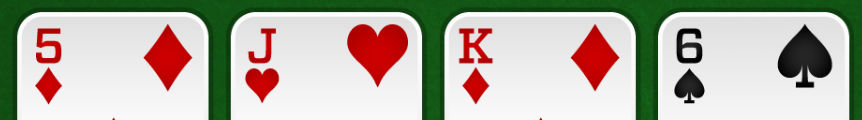

In [35]:
img

In [22]:
# Import required packages
import cv2
import pytesseract

# Mention the installed location of Tesseract-OCR in your system
# pytesseract.pytesseract.tesseract_cmd = 'System_path_to_tesseract.exe'

# Read image from which text needs to be extracted
img = cv2.imread("my_screenshot.jpg")

# Preprocessing the image starts

# Convert the image to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Performing OTSU threshold
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

# Specify structure shape and kernel size.
# Kernel size increases or decreases the area
# of the rectangle to be detected.
# A smaller value like (10, 10) will detect
# each word instead of a sentence.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

# Applying dilation on the threshold image
dilation = cv2.dilate(thresh1, rect_kernel, iterations = 1)

# Finding contours
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,
												cv2.CHAIN_APPROX_NONE)

# Creating a copy of image
im2 = img.copy()

# A text file is created and flushed
file = open("recognized.txt", "w+")
file.write("")
file.close()

# Looping through the identified contours
# Then rectangular part is cropped and passed on
# to pytesseract for extracting text from it
# Extracted text is then written into the text file
for cnt in contours:
	x, y, w, h = cv2.boundingRect(cnt)
	
	# Drawing a rectangle on copied image
	rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2)
	
	# Cropping the text block for giving input to OCR
	cropped = im2[y:y + h, x:x + w]
	
	# Open the file in append mode
	file = open("recognized.txt", "a")
	
	# Apply OCR on the cropped image
	text = pytesseract.image_to_string(cropped)
	
	# Appending the text into file
	file.write(text)
	file.write("\n")
	
	# Close the file
	file.close


TypeError: Unsupported image object